# Project 2: Analyzing data on towed vehicles in Baltimore City

This notebook analyzes data on towed vehicles in Baltimore City. My hypotheses are that there will be fewer cars towed on weekends than on weekdays, and that out-of-state vehicles will be more likely to be impounded for parking violations than vehicles from Maryland.

The dataset can be found at https://data.baltimorecity.gov/datasets/towing/data

Pandas functions can be found at https://pandas.pydata.org/docs/

MatPlotLib functions can be found at https://pandas.pydata.org/docs/

Note: this data is continuously updated

In [1]:
# Import required packages
import pandas
import matplotlib
import matplotlib.pyplot as plt

print('Pandas version:', pandas.__version__)
print('MatPlotLib version:', matplotlib.__version__)

Pandas version: 1.1.3
MatPlotLib version: 3.3.2


In [2]:
towing_data = pandas.read_csv('https://opendata.arcgis.com/datasets/93884de333ae43118871ca47624eb31c_0.csv', low_memory=False)
towing_data.head()

,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagNumber,TagState,...,HoldDateTime,HoldReleasedDateTime,HoldReleasedNotifyDate,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType,TotalPaid,ESRI_OID
0,F000001,2020/01/02 05:57:00+00,Parking Violation,NaN,NaN,MERCEDES,E430,NaN,7DW8271,MD,...,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,2020/01/03 17:25:00+00,Transferred to Pulaski Lot,0.0,3
1,F000002,2020/01/02 06:16:00+00,Parking Violation,NaN,NaN,TOYOTA,CAMRY,NaN,4CR5168,MD,...,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,2020/01/03 17:26:00+00,Transferred to Pulaski Lot,0.0,1
2,F000003,2020/01/02 07:27:00+00,Parking Violation,NaN,18,TOYOTA,SIENNA,NaN,GHYG21,FL,...,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,2020/01/03 18:49:00+00,Transferred to Pulaski Lot,0.0,2
3,F000004,2020/01/02 07:40:00+00,Parking Violation,NaN,NaN,HONDA,CIVIC,NaN,178842T,MD,...,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,2020/01/02 17:59:00+00,Release to Owner,282.0,4
4,F000005,2020/01/02 07:25:00+00,Parking Violation,NaN,18,HYUNDAI,IONIQ,NaN,9AM1575,MD,...,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,2020/01/02 11:14:00+00,Release to Owner,272.0,5


In [3]:
towing_data.shape

(259403, 40)

## Clean the dataset

In [4]:
towing_data.columns

Index(['PropertyNumber', 'TowedDateTime', 'PickupType', 'VehicleType',
       'VehicleYear', 'VehicleMake', 'VehicleModel', 'VehicleColor',
       'TagNumber', 'TagState', 'TowCompany', 'TowCharge', 'TowedFromLocation',
       'HowTowed', 'SlingUsed', 'DollyUsed', 'rollBackUsed', 'pinPulled',
       'pinReplaced', 'WheelLift', 'Stinger', 'ReceivingDateTime',
       'StorageYard', 'StorageLocation', 'StorageTelephone',
       'TitleRenounciation', 'TRDateTime', 'PersonalPropRemoved',
       'PersonalPropLeftInVehicle', 'HoldType', 'HoldDateTime',
       'HoldReleasedDateTime', 'HoldReleasedNotifyDate', 'RemovedFromYardDate',
       'StolenVehicleFlag', 'Status', 'ReleaseDateTime', 'ReleaseType',
       'TotalPaid', 'ESRI_OID'],
      dtype='object')

In [5]:
# Drop unnecessary columns
towing_data=towing_data.drop(columns=['VehicleColor','TagNumber','TowCharge','HowTowed','SlingUsed',
                                      'DollyUsed','rollBackUsed','pinPulled','pinReplaced','WheelLift',
                                      'Stinger','StorageTelephone','PersonalPropRemoved','PersonalPropLeftInVehicle',
                                      'HoldType','HoldDateTime','HoldReleasedDateTime','HoldReleasedNotifyDate',
                                      'TotalPaid','ESRI_OID'])
towing_data.shape

(259403, 20)

In [6]:
# Check for duplicates
towing_data.loc[towing_data.duplicated()]

,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,TagState,TowCompany,TowedFromLocation,ReceivingDateTime,StorageYard,StorageLocation,TitleRenounciation,TRDateTime,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType


In [7]:
# Check for missing dates
towing_data.loc[towing_data['TowedDateTime'].isna()]

,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,TagState,TowCompany,TowedFromLocation,ReceivingDateTime,StorageYard,StorageLocation,TitleRenounciation,TRDateTime,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType


There are no duplicates and no missing dates.

## Clean the times column and extract relevant information from timestamps

In [8]:
# Examine the towing dates and times
times = towing_data['TowedDateTime'].sort_values().reset_index(drop=True)
times

0         1970/01/01 00:00:00+00
1         1970/01/01 00:00:00+00
2         1970/01/01 00:00:00+00
3         1970/01/01 00:00:00+00
4         1970/01/01 00:00:00+00
                   ...          
259398    2021/04/03 04:00:00+00
259399    2021/04/03 04:14:00+00
259400    2110/01/14 23:09:00+00
259401    2418/04/15 23:15:00+00
259402    5019/07/09 14:23:00+00
Name: TowedDateTime, Length: 259403, dtype: object

In [9]:
type(times[0])

str

In [10]:
# The dates were parsed as strings. Find where the dates are missing.
missing_dates = towing_data.loc[towing_data['TowedDateTime']=='1970/01/01 00:00:00+00']
missing_dates.shape

(33, 20)

In [11]:
# There are only 33 records where the date is missing or improperly formatted. Drop these records
towing_data = towing_data.loc[towing_data['TowedDateTime']!='1970/01/01 00:00:00+00']
towing_data.shape

(259370, 20)

In [12]:
# Three records have the years entered incorrectly. Fix these records.
incorrect_times = times.tail(3).reset_index(drop=True)
incorrect_times

0    2110/01/14 23:09:00+00
1    2418/04/15 23:15:00+00
2    5019/07/09 14:23:00+00
Name: TowedDateTime, dtype: object

In [13]:
# Use string slicing on each date to fix the incorrect digits
correct_times = []
correct_times.append(incorrect_times[0][0]+'0'+incorrect_times[0][2:])
correct_times.append(incorrect_times[1][0]+'0'+incorrect_times[1][2:])
correct_times.append('2'+incorrect_times[2][1:])

correct_times = pandas.Series(correct_times)
correct_times

0    2010/01/14 23:09:00+00
1    2018/04/15 23:15:00+00
2    2019/07/09 14:23:00+00
dtype: object

In [14]:
# Replace the incorrect dates with the corrected ones
towing_data = towing_data.replace({incorrect_times[0]:correct_times[0],incorrect_times[1]:correct_times[1],
                                   incorrect_times[2]:correct_times[2]})

In [15]:
# Check the times to see if the years make sense
times = towing_data['TowedDateTime'].sort_values()
times

49253     2010/01/01 00:00:00+00
49255     2010/01/01 00:02:00+00
49254     2010/01/01 00:30:00+00
49257     2010/01/01 01:26:00+00
49256     2010/01/01 01:30:00+00
                   ...          
259374    2021/04/03 01:07:00+00
259377    2021/04/03 01:37:00+00
259378    2021/04/03 03:45:00+00
259379    2021/04/03 04:00:00+00
259380    2021/04/03 04:14:00+00
Name: TowedDateTime, Length: 259370, dtype: object

In [16]:
# Extract the year and the day of week from the timestamps and add to the dataframe
timestamps = pandas.to_datetime(towing_data['TowedDateTime'])
towing_data['Year'] = timestamps.dt.year
towing_data['DayOfWeek'] = timestamps.dt.dayofweek
towing_data['DayOfWeek_Name'] = timestamps.dt.day_name()

## Clean the pickup type data

In [17]:
# Check for missing values for pickup type
towing_data.loc[towing_data['PickupType'].isna()]

,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,TagState,TowCompany,TowedFromLocation,...,TitleRenounciation,TRDateTime,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType,Year,DayOfWeek,DayOfWeek_Name
81733,P223002,2011/08/19 09:19:00+00,NaN,Car,99,Acura,3.5 RL,MD,Aarons Automotive Services,1000 E Madison St,...,0.0,1970/01/01 00:00:00+00,2011/08/20 00:00:00+00,0.0,Released,2011/08/20 11:18:00+00,Reclaimed by Owner,2011,4,Friday
131242,P272545,2014/02/23 08:07:00+00,NaN,Car,04,Kia,Spectra,MD,"Frankford Towing, Inc.",100 Madison Ave,...,0.0,1970/01/01 00:00:00+00,2014/02/28 00:00:00+00,0.0,Released,2014/02/28 14:10:00+00,Reclaimed by Owner,2014,6,Sunday
203658,P345015,2017/07/31 19:55:00+00,NaN,Scooter,05,Vento,NaN,NaN,Universal Towing LLC,1200 W Pratt St,...,0.0,1970/01/01 00:00:00+00,2019/07/22 00:00:00+00,0.0,Active,2019/07/22 14:43:00+00,Destroyed (No VIN),2017,0,Monday
209776,P351135,2017/11/08 13:19:00+00,NaN,Car,00,Ford,Focus,NaN,City,2800 Pulaski Highway,...,0.0,1970/01/01 00:00:00+00,2018/02/28 00:00:00+00,0.0,Auctioned,2018/02/28 08:00:00+00,Auctioned,2017,2,Wednesday
239126,P380502,2019/06/10 02:41:00+00,NaN,Convertible,04,Volkswagon,Beetle,MD,City,2603 Shirley Ave,...,0.0,1970/01/01 00:00:00+00,2019/09/11 00:00:00+00,0.0,Auctioned,2019/09/11 08:00:00+00,Auctioned,2019,0,Monday
243029,P384411,2019/09/26 17:32:00+00,NaN,Van,95,Ford,Explorer,MD,City,0,...,0.0,1970/01/01 00:00:00+00,2020/02/26 00:00:00+00,0.0,Auctioned,2020/02/26 08:00:00+00,Auctioned,2019,3,Thursday


There are only six missing values. These rows will be excluded from the analysis with little effect.

In [18]:
# Count the number of tows for each pickup type
pickup_types = towing_data['PickupType'].value_counts().to_frame().reset_index()
pickup_types

,index,PickupType
0,Police Action (Misc.),52847
1,Parking Violation,49241
2,Stolen Recovered,29271
3,Accident,29154
4,Abandoned (Towed by City),20341
5,Scofflaw,19792
6,Accident (Owner/Operator Hospitalized),16179
7,Police Action (Arrest of Operator),13404
8,Police Action (Narcotic),10649
9,Impound (Illegal Parking),8139


In [19]:
pickup_types = pickup_types.rename(columns={'index':'Type','PickupType':'Count'})

In [20]:
# Consolidate similar reasons into the same category 
# example: different types of police holds will all become Police Hold
accidents = []
police_actions = []
abandoned = []
stolen = []

for pickup_type in pickup_types['Type']:
    if pickup_type.startswith('Accident'):
        accidents.append(pickup_type)
    elif pickup_type.startswith('Police Action'):
        police_actions.append(pickup_type)
    elif pickup_type.startswith('Abandoned'):
        abandoned.append(pickup_type)
    elif pickup_type.startswith('Stolen Recovered'):
        stolen.append(pickup_type)

In [21]:
# Replace similar pickup types with the corresponding general type
towing_data = towing_data.replace(accidents, 'Accident')
towing_data = towing_data.replace(police_actions, 'Police Action')
towing_data = towing_data.replace(abandoned, 'Abandoned')
towing_data = towing_data.replace(stolen, 'Stolen Recovered')

In [22]:
towing_data = towing_data.replace({'Impound (Illegal Parking)':'Parking Violation','ACCIDENT':'Accident', 
                                   'STOLEN POLICE HOLD':'Stolen Police Hold'})

In [23]:
types = towing_data['PickupType'].value_counts().to_frame().reset_index()
types

,index,PickupType
0,Police Action,79350
1,Parking Violation,57380
2,Accident,45480
3,Stolen Recovered,29453
4,Abandoned,22950
5,Scofflaw,19792
6,Burns,2917
7,ACCIDENT,581
8,Relocate,441
9,Stolen Police Hold,437


In [24]:
accident = types['index'][7]
towing_data = towing_data.replace({accident:'Accident'})

In [25]:
pickup_types = towing_data['PickupType'].value_counts().to_frame().reset_index()
pickup_types = pickup_types.rename(columns={'index':'Type','PickupType':'Count'})
pickup_types

,Type,Count
0,Police Action,79350
1,Parking Violation,57380
2,Accident,46061
3,Stolen Recovered,29453
4,Abandoned,22950
5,Scofflaw,19792
6,Burns,2917
7,Relocate,441
8,Stolen Police Hold,437
9,street cleaning,215


## Analyze data by weekday

The first hypothesis is that there are fewer cars towed on weekends than on weekdays.

In [26]:
# Get the totals by weekday
total_by_weekday = towing_data['DayOfWeek'].value_counts().to_frame().reset_index()
total_by_weekday

,index,DayOfWeek
0,4,43480
1,3,41433
2,2,41049
3,1,41047
4,0,39103
5,5,27552
6,6,25706


In [27]:
# Sort the values by day of the week and replace the numerical days with the corresponding day name
total_by_weekday = total_by_weekday.sort_values('index').reset_index(drop=True)
total_by_weekday = total_by_weekday.rename(columns={'index':'DayOfWeek','DayOfWeek':'Count'})
total_by_weekday = total_by_weekday.replace({0:'Monday',1:'Tuesday',2:'Wednesday',
                                             3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
total_by_weekday

,DayOfWeek,Count
0,Monday,39103
1,Tuesday,41047
2,Wednesday,41049
3,Thursday,41433
4,Friday,43480
5,Saturday,27552
6,Sunday,25706


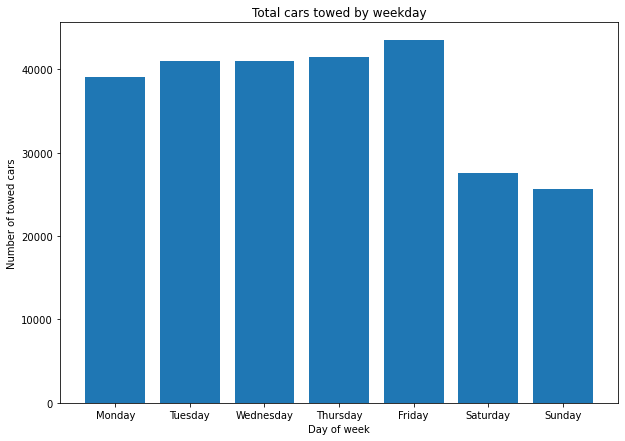

In [28]:
# Figure methods: https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure
# Axes methods: https://matplotlib.org/stable/api/axes_api.html?highlight=axes#module-matplotlib.axes
fig1,ax1 = plt.subplots()
ax1.bar(total_by_weekday['DayOfWeek'],total_by_weekday['Count'])

ax1.set_title('Total cars towed by weekday')
ax1.set_xlabel('Day of week')
ax1.set_ylabel('Number of towed cars')
fig1.set_figwidth(10)
fig1.set_figheight(7)


The hypothesis that fewer cars will be towed on weekends than weekdays seems to be correct. Test it again by restricting to one year.

In [29]:
# Restrict to one year
towing_2019 = towing_data.loc[towing_data['Year']==2019]
total_by_weekday_2019 = towing_2019['DayOfWeek'].value_counts().to_frame().reset_index()

total_by_weekday_2019 = total_by_weekday_2019.sort_values('index').reset_index(drop=True)
total_by_weekday_2019 = total_by_weekday_2019.rename(columns={'index':'DayOfWeek','DayOfWeek':'Count'})
total_by_weekday_2019 = total_by_weekday_2019.replace({0:'Monday',1:'Tuesday',2:'Wednesday',
                                             3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
total_by_weekday_2019

,DayOfWeek,Count
0,Monday,3314
1,Tuesday,3401
2,Wednesday,3324
3,Thursday,3150
4,Friday,3244
5,Saturday,1593
6,Sunday,1575


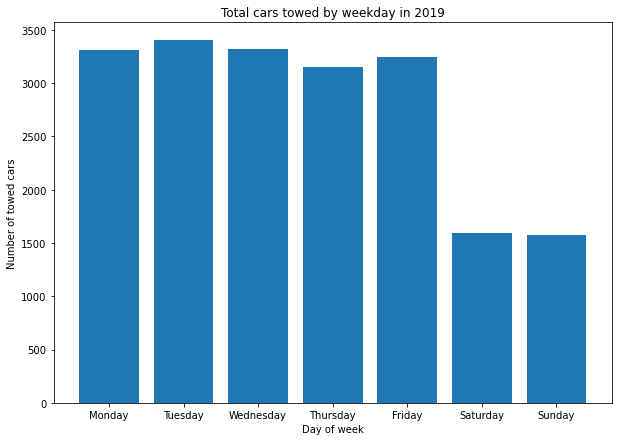

In [30]:
fig2,ax2 = plt.subplots()
ax2.bar(total_by_weekday_2019['DayOfWeek'],total_by_weekday_2019['Count'])

ax2.set_title('Total cars towed by weekday in 2019')
ax2.set_xlabel('Day of week')
ax2.set_ylabel('Number of towed cars')
fig2.set_figwidth(10)
fig2.set_figheight(7)

The hypothesis that there are fewer cars towed on weekends is supported by the data.

## Analyze towing reasons by state

The second hypothesis is that parking violations will be more common for out-of-state vehicles than with vehicles from Maryland.

In [31]:
towing_data.loc[towing_data['TagState'].isna()]

,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,TagState,TowCompany,TowedFromLocation,...,TitleRenounciation,TRDateTime,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType,Year,DayOfWeek,DayOfWeek_Name
49294,P190544,2010/01/01 10:03:00+00,Stolen Recovered,Car,99,Lexus,GS400,NaN,Bermans Towing,900 N Mount St,...,0.0,1970/01/01 00:00:00+00,2010/02/01 00:00:00+00,1.0,Released,2010/02/01 10:28:00+00,Reclaimed by Owner,2010,4,Friday
49306,P190556,2010/01/01 16:34:00+00,Police Action,Car,93,Buick,Lesabre,NaN,Bermans Towing,3900 Edmondson Ave.,...,0.0,1970/01/01 00:00:00+00,2010/01/25 00:00:00+00,0.0,Released,2010/01/25 16:20:00+00,Reclaimed by Owner,2010,4,Friday
49319,P190569,2010/01/02 01:07:00+00,Police Action,Car,95,Honda,Accord,NaN,Bermans Towing,2900 Taney Rd,...,0.0,1970/01/01 00:00:00+00,2010/01/06 00:00:00+00,0.0,Released,2010/01/06 14:47:00+00,Reclaimed by Owner,2010,5,Saturday
49322,P190572,2010/01/02 02:00:00+00,Police Action,Car,07,Honda,Accord,NaN,Jim Elliotts Towing,400 E Northern Parkway,...,0.0,1970/01/01 00:00:00+00,2010/01/02 00:00:00+00,0.0,Released,2010/01/02 10:07:00+00,Reclaimed by Owner,2010,5,Saturday
49323,P190573,2010/01/02 01:58:00+00,Police Action,Car,03,Mitsubishi,Galant,NaN,Jim Elliotts Towing,1500 E 36th St,...,0.0,1970/01/01 00:00:00+00,2010/01/06 00:00:00+00,0.0,Released,2010/01/06 09:00:00+00,Reclaimed by Owner,2010,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259393,P402013,2021/03/30 19:58:00+00,Police Action,Car,99,Infiniti,I30,NaN,"Frankford Towing, Inc.",1800 Washington Blvd,...,0.0,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,0.0,Active,1970/01/01 00:00:00+00,NaN,2021,1,Tuesday
259394,P402014,2021/03/30 21:39:00+00,Police Action,Car,05,Ford,Crown Victoria,NaN,McDels Enterprise Inc.,500 Presstman St.,...,0.0,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,0.0,NaN,1970/01/01 00:00:00+00,NaN,2021,1,Tuesday
259396,P402016,2021/03/30 23:34:00+00,Police Action,Dirt Bike,03,Suzuki,125,NaN,"Frankford Towing, Inc.",2400 E Hoffman St,...,0.0,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,0.0,NaN,1970/01/01 00:00:00+00,NaN,2021,1,Tuesday
259397,P402017,2021/03/31 02:55:00+00,Accident,Car,04,Chevrolet,Impala,NaN,McDels Enterprise Inc.,2500 Madison Ave,...,0.0,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,0.0,NaN,1970/01/01 00:00:00+00,NaN,2021,2,Wednesday


In [32]:
# For this analysis, we will only focus on the vehicles for which we know the state.
# Add a Boolean column showing whether a car is in Maryland.
in_state = (towing_data['TagState']=='MD')
towing_data['InState'] = in_state

In [33]:
# Create a new dataframe without the missing state data
towing_data_state = towing_data.dropna(subset=['TagState'])

In [34]:
towing_data_state['InState'].value_counts().to_frame()

,InState
True,191279
False,31012


In [35]:
# Find how many cars were towed for parking violations
illegal_parking = towing_data_state.loc[towing_data_state['PickupType']=='Parking Violation']
illegal_parking.head()

,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,TagState,TowCompany,TowedFromLocation,...,TRDateTime,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType,Year,DayOfWeek,DayOfWeek_Name,InState
0,F000001,2020/01/02 05:57:00+00,Parking Violation,NaN,NaN,MERCEDES,E430,MD,City,200 S CALHOUN STREET,...,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,2020/01/03 17:25:00+00,Transferred to Pulaski Lot,2020,3,Thursday,True
1,F000002,2020/01/02 06:16:00+00,Parking Violation,NaN,NaN,TOYOTA,CAMRY,MD,Cherryhill Towing Service,1625 N GILMORE STREET,...,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,2020/01/03 17:26:00+00,Transferred to Pulaski Lot,2020,3,Thursday,True
2,F000003,2020/01/02 07:27:00+00,Parking Violation,NaN,18,TOYOTA,SIENNA,FL,McDels Towing & Recovery,100 W FRANKLIN STREET,...,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,2020/01/03 18:49:00+00,Transferred to Pulaski Lot,2020,3,Thursday,False
3,F000004,2020/01/02 07:40:00+00,Parking Violation,NaN,NaN,HONDA,CIVIC,MD,C & S Towing,2300 E FAYETTE STREET,...,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,2020/01/02 17:59:00+00,Release to Owner,2020,3,Thursday,True
4,F000005,2020/01/02 07:25:00+00,Parking Violation,NaN,18,HYUNDAI,IONIQ,MD,McDels Towing & Recovery,UNIT W FRANKLIN STREET,...,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,2020/01/02 11:14:00+00,Release to Owner,2020,3,Thursday,True


In [36]:
state_parking_totals = illegal_parking['InState'].value_counts().to_frame()
state_parking_totals

,InState
True,45389
False,11756


Maryland clearly has more violations than other states. Let's look at which state has the higher percentage of parking violations.

In [37]:
state_towing_totals = towing_data_state['InState'].value_counts().to_frame()
state_towing_totals

,InState
True,191279
False,31012


In [38]:
# Use the totals dataframe to save the number of parking violations and towed cars for Maryland and for out-of-state
in_state_parking = float(state_parking_totals['InState'].loc[True])
out_of_state_parking = float(state_parking_totals['InState'].loc[False])

in_state_total = float(state_towing_totals['InState'].loc[True])
out_of_state_total = float(state_towing_totals['InState'].loc[False])

In [39]:
# https://www.w3schools.com/python/ref_func_round.asp
state_percentage = (in_state_parking/in_state_total)*100
out_of_state_percentage = (out_of_state_parking/out_of_state_total)*100
print(round(state_percentage, 2), 'percent of towed cars from Maryland are towed for parking violations.')
print(round(out_of_state_percentage, 2), 'percent of towed cars from out of state are towed for parking violations.')

23.73 percent of towed cars from Maryland are towed for parking violations.
37.91 percent of towed cars from out of state are towed for parking violations.


Out-of-state drivers seem to have a higher percentage of parking violations than Maryland drivers. Visualize this result.

In [40]:
# Sort records by in-state versus out-of-state
in_state = towing_data_state.loc[towing_data_state['InState']]
out_of_state = towing_data_state.loc[towing_data_state['InState']==False]

In [41]:
# Create tables displaying the count of pickup types for in-state and out-of-state
in_state_types = in_state['PickupType'].value_counts().to_frame()
in_state_types = in_state_types.rename(columns={'PickupType':'InState'}).reset_index()

out_of_state_types = out_of_state['PickupType'].value_counts().to_frame()
out_of_state_types = out_of_state_types.rename(columns={'PickupType':'OutOfState'}).reset_index()

in_state_types

,index,InState
0,Police Action,53383
1,Parking Violation,45389
2,Accident,39599
3,Stolen Recovered,22732
4,Scofflaw,15804
5,Abandoned,11299
6,Burns,2091
7,Relocate,315
8,Stolen Police Hold,266
9,street cleaning,188


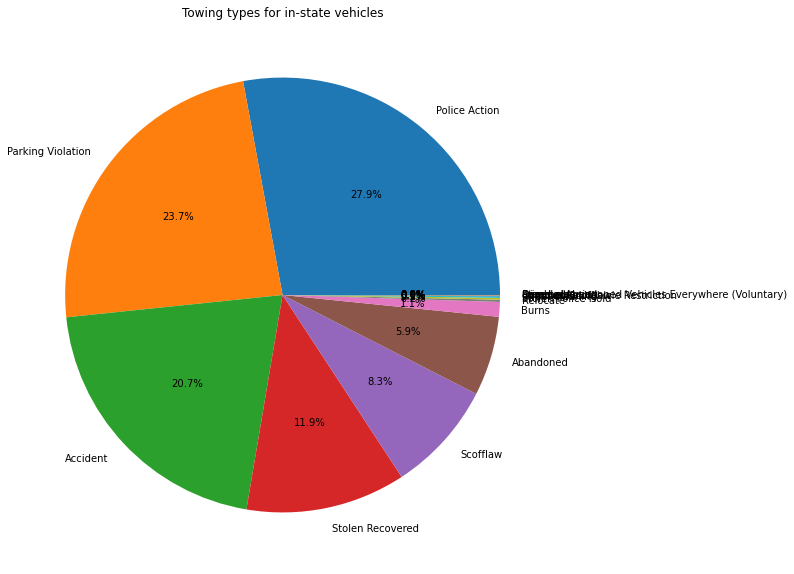

In [42]:
# Pie chart information: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
fig3,ax3 = plt.subplots()
ax3.pie(in_state_types['InState'], labels=in_state_types['index'], autopct='%1.1f%%')
ax3.set_title('Towing types for in-state vehicles')

fig3.set_figheight(10)
fig3.set_figwidth(10)

plt.show()

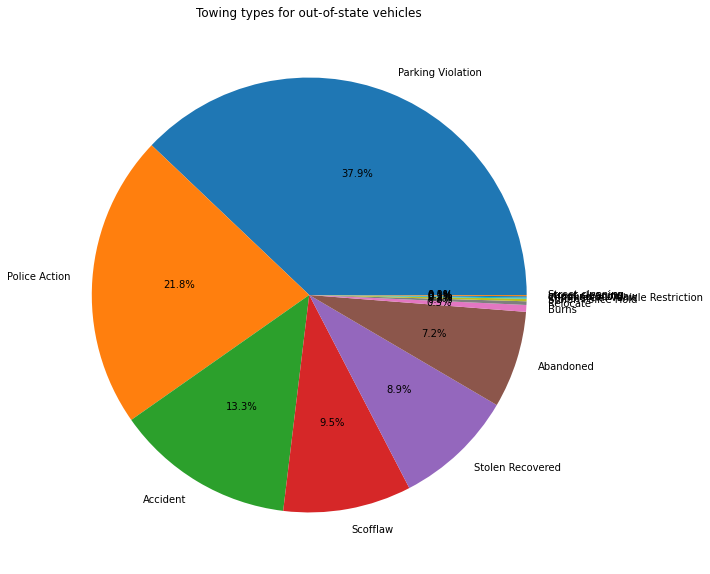

In [43]:
fig4,ax4 = plt.subplots()
ax4.pie(out_of_state_types['OutOfState'], labels=out_of_state_types['index'], autopct='%1.1f%%')
ax4.set_title('Towing types for out-of-state vehicles')

fig4.set_figheight(10)
fig4.set_figwidth(10)

plt.show()

In [44]:
# Plot the percentage pf pickup types for the whole dataset for comparison
# Refers to pickup types dataframe from when the pickup types column was cleaned
pickup_types

,Type,Count
0,Police Action,79350
1,Parking Violation,57380
2,Accident,46061
3,Stolen Recovered,29453
4,Abandoned,22950
5,Scofflaw,19792
6,Burns,2917
7,Relocate,441
8,Stolen Police Hold,437
9,street cleaning,215


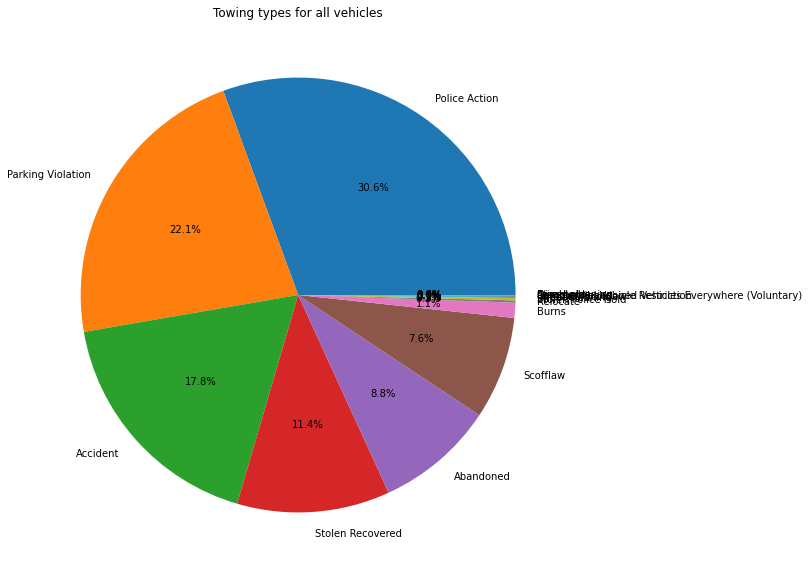

In [45]:
fig5, ax5 = plt.subplots()
ax5.pie(pickup_types['Count'], labels=pickup_types['Type'], autopct='%1.1f%%')
ax5.set_title('Towing types for all vehicles')

fig5.set_figheight(10)
fig5.set_figwidth(10)

plt.show()

Out-of-states seem to have a high percentage of parking violations compared to all vehicles combined, but this data is incomplete so the result may be skewed. However, Maryland vehicles have a higher number of parking violations overall, due to the fact that more in-state vehicles are towed than out-of-state vehicles overall.